In [1]:
import pandas as pd

In [2]:
df1 = pd.read_excel('./GDP/2009-2013地区生产总值.xls', skiprows=[0,1,2,3,4], index_col=0, header=0)
del df1['Unnamed: 1']
df1.drop(['2009.1','2010.1','2011.1','2012.1','2013.1'], axis=1, inplace=True)
df1.index.name = '地区'
df1

,2009,2010,2011,2012,2013
地区,,,,,
北京,12153.03,14113.58,16251.93,17879.40,19500.56
天津,7521.85,9224.46,11307.28,12893.88,14370.16
河北,17235.48,20394.26,24515.76,26575.01,28301.41
山西,7358.31,9200.86,11237.55,12112.83,12602.24
内蒙古,9740.25,11672.00,14359.88,15880.58,16832.38
辽宁,15212.49,18457.27,22226.70,24846.43,27077.65
吉林,7278.75,8667.58,10568.83,11939.24,12981.46
黑龙江,8587.00,10368.60,12582.00,13691.58,14382.93
上海,15046.45,17165.98,19195.69,20181.72,21602.12


In [3]:
df2 = []
for year in range(2014,2018):
    df = pd.read_excel('./GDP/{}各地区生产总值.xls'.format(year), skiprows=[0,1,2,3,4], index_col=0, header=0).iloc[:,1:2]
    df.columns = ['GDP']
    df['年份'] = year
    df.index.name = '地区'
    df2.append(df)

In [4]:
df2 = pd.DataFrame().append(df2)
df2 = df2.reset_index(drop=False).set_index(['地区','年份']).unstack()['GDP']
df2.columns.name = ''

In [5]:
df2

,2014,2015,2016,2017
地区,,,,
上海,23567.7,25123.5,28178.7,30633.0
云南,12814.6,13619.2,14788.4,16376.3
内蒙古,17769.5,17831.5,18128.1,16096.2
北京,21330.8,23014.6,25669.1,28014.9
吉林,14631.4,15507.9,14776.8,14944.5
四川,28536.7,30053.1,32934.5,36980.2
天津,15727.0,16538.2,17885.4,18549.2
宁夏,2752.1,2911.8,3168.6,3443.6
安徽,20848.8,22005.6,24407.6,27018.0


In [6]:
df3 = pd.read_excel('./GDP/2018各地区生产总值.xls', skiprows=[0,1,2,3,4], index_col=0, header=1).iloc[2:-3,1:2]
df3.columns = [2018]
df3.index = [''.join(i.split()) for i in list(df3.index)]
df3

,2018
北京,30319.98
天津,18809.64
河北,36010.27
山西,16818.11
内蒙古,17289.22
辽宁,25315.35
吉林,15074.62
黑龙江,16361.62
上海,32679.87
江苏,92595.40


In [7]:
df = pd.concat([df1,df2,df3], axis=1)
df.index.name = '地区'

In [8]:
df

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
地区,,,,,,,,,,
北京,12153.03,14113.58,16251.93,17879.40,19500.56,21330.8,23014.6,25669.1,28014.9,30319.98
天津,7521.85,9224.46,11307.28,12893.88,14370.16,15727.0,16538.2,17885.4,18549.2,18809.64
河北,17235.48,20394.26,24515.76,26575.01,28301.41,29421.2,29806.4,32070.5,34016.3,36010.27
山西,7358.31,9200.86,11237.55,12112.83,12602.24,12761.5,12766.5,13055.6,15528.4,16818.11
内蒙古,9740.25,11672.00,14359.88,15880.58,16832.38,17769.5,17831.5,18128.1,16096.2,17289.22
辽宁,15212.49,18457.27,22226.70,24846.43,27077.65,28626.6,28669.0,22246.9,23409.2,25315.35
吉林,7278.75,8667.58,10568.83,11939.24,12981.46,14631.4,15507.9,14776.8,14944.5,15074.62
黑龙江,8587.00,10368.60,12582.00,13691.58,14382.93,15275.2,15083.7,15386.1,15902.7,16361.62
上海,15046.45,17165.98,19195.69,20181.72,21602.12,23567.7,25123.5,28178.7,30633.0,32679.87


In [9]:
df.to_excel('gdp.xlsx')

In [16]:
import pandas as pd
import numpy as np

In [17]:
df1 = pd.read_excel('./知识产权年鉴数据.xlsx')
df1 = df1.loc[:,['Unnamed: 0','Unnamed: 1','结案/立案','专利_申请量','专利_授权量','职务专利授权量百分比']]
df1.columns = ['年份','地区','结案率','专利_申请量','专利_授权量','职务专利授权量百分比']
df1['年份'] = df1['年份'].fillna(method='ffill').map(lambda x: int(x))
df1['结案率'] = df1['结案率'].replace(np.inf, 0)
df1['结案率'] = df1['结案率'].map(lambda x: 1 if x > 1 else x)
df1

,年份,地区,结案率,专利_申请量,专利_授权量,职务专利授权量百分比
0,2008,北京,0.642857,270785,17747,0.673297
1,2008,天津,0.800000,104799,6790,0.745950
2,2008,河北,0.842105,86306,5496,0.319141
3,2008,山西,0.666667,33231,2279,0.488811
4,2008,内蒙古,0.900000,21518,1328,0.327560
...,...,...,...,...,...,...
336,2018,甘肃,0.789474,76512,41479,0.791437
337,2018,青海,0.934286,27882,13958,0.740006
338,2018,宁夏,NaN,4439,2668,0.776987
339,2018,新疆,0.837838,9860,5658,0.882114


In [18]:
df2 = pd.read_excel('./各省人口数（2009-2018）.xlsx')
df2 = df2.set_index('地区').unstack().reset_index()
df2.columns = ['年份','地区','人口数']
df2 = df2[['地区','年份','人口数']]
df2['人口数'] = df2['人口数'] * 100000
df2

,地区,年份,人口数
0,北京,2009,186000000
1,天津,2009,122800000
2,河北,2009,703400000
3,山西,2009,342700000
4,内蒙古,2009,245800000
...,...,...,...
305,陕西,2018,386400000
306,甘肃,2018,263700000
307,青海,2018,60300000
308,宁夏,2018,68800000


In [19]:
df = pd.merge(left=df1,right=df2,on=['地区','年份'],how='inner')
df

,年份,地区,结案率,专利_申请量,专利_授权量,职务专利授权量百分比,人口数
0,2009,北京,1.000000,319205,22921,0.745386,186000000
1,2009,天津,0.642857,123771,7404,0.799163,122800000
2,2009,河北,1.000000,97663,6839,0.444363,703400000
3,2009,山西,NaN,40031,3227,0.552526,342700000
4,2009,内蒙古,1.000000,23993,1494,0.362115,245800000
...,...,...,...,...,...,...,...
305,2018,甘肃,0.789474,76512,41479,0.791437,263700000
306,2018,青海,0.934286,27882,13958,0.740006,60300000
307,2018,宁夏,NaN,4439,2668,0.776987,68800000
308,2018,新疆,0.837838,9860,5658,0.882114,248700000


In [20]:
df3 = pd.read_excel('./gdp.xlsx')
df3 = df3.set_index('地区').unstack().reset_index()
df3.columns = ['年份','地区','GDP']
df3['年份'] = df3['年份'].map(lambda x: int(x))
df3

,年份,地区,GDP
0,2009,北京,12153.03
1,2009,天津,7521.85
2,2009,河北,17235.48
3,2009,山西,7358.31
4,2009,内蒙古,9740.25
...,...,...,...
305,2018,陕西,24438.32
306,2018,甘肃,8246.07
307,2018,青海,2865.23
308,2018,宁夏,3705.18


In [21]:
df = pd.merge(left=df,right=df3,on=['地区','年份'],how='inner')
df

,年份,地区,结案率,专利_申请量,专利_授权量,职务专利授权量百分比,人口数,GDP
0,2009,北京,1.000000,319205,22921,0.745386,186000000,12153.03
1,2009,天津,0.642857,123771,7404,0.799163,122800000,7521.85
2,2009,河北,1.000000,97663,6839,0.444363,703400000,17235.48
3,2009,山西,NaN,40031,3227,0.552526,342700000,7358.31
4,2009,内蒙古,1.000000,23993,1494,0.362115,245800000,9740.25
...,...,...,...,...,...,...,...,...
305,2018,甘肃,0.789474,76512,41479,0.791437,263700000,8246.07
306,2018,青海,0.934286,27882,13958,0.740006,60300000,2865.23
307,2018,宁夏,NaN,4439,2668,0.776987,68800000,3705.18
308,2018,新疆,0.837838,9860,5658,0.882114,248700000,12199.08


In [22]:
df4 = pd.read_excel('./各省进出口总额.xlsx').iloc[:,:-1]
df4.columns = ['地区'] + list(range(2009, 2019))
df4 = df4.set_index('地区').unstack().reset_index()
df4.columns = ['年份','地区','进出口总额']
df4

,年份,地区,进出口总额
0,2009,北京,870.9
1,2009,天津,720.3
2,2009,河北,402.7
3,2009,山西,93.2
4,2009,内蒙古,94.6
...,...,...,...
305,2018,陕西,522.5
306,2018,甘肃,64.9
307,2018,青海,5.8
308,2018,宁夏,40.5


In [23]:
df = pd.merge(left=df,right=df4,on=['地区','年份'],how='inner')
df

,年份,地区,结案率,专利_申请量,专利_授权量,职务专利授权量百分比,人口数,GDP,进出口总额
0,2009,北京,1.000000,319205,22921,0.745386,186000000,12153.03,870.9
1,2009,天津,0.642857,123771,7404,0.799163,122800000,7521.85,720.3
2,2009,河北,1.000000,97663,6839,0.444363,703400000,17235.48,402.7
3,2009,山西,NaN,40031,3227,0.552526,342700000,7358.31,93.2
4,2009,内蒙古,1.000000,23993,1494,0.362115,245800000,9740.25,94.6
...,...,...,...,...,...,...,...,...,...
305,2018,甘肃,0.789474,76512,41479,0.791437,263700000,8246.07,64.9
306,2018,青海,0.934286,27882,13958,0.740006,60300000,2865.23,5.8
307,2018,宁夏,NaN,4439,2668,0.776987,68800000,3705.18,40.5
308,2018,新疆,0.837838,9860,5658,0.882114,248700000,12199.08,347.0


In [24]:
df5 = pd.read_excel('./全社会固定资产投入.xlsx').iloc[:,:-2]
df5.columns = ['地区'] + list(range(2009, 2019))
df5 = df5.set_index('地区').unstack().reset_index()
df5.columns = ['年份','地区','全社会固定资产投入']
df5

,年份,地区,全社会固定资产投入
0,2009,北京,3814.7
1,2009,天津,3389.8
2,2009,河北,8866.6
3,2009,山西,3531.2
4,2009,内蒙古,5475.4
...,...,...,...
305,2018,陕西,23819.4
306,2018,甘肃,5827.8
307,2018,青海,3883.6
308,2018,宁夏,3728.4


In [25]:
df = pd.merge(left=df,right=df5,on=['地区','年份'],how='inner')
df

,年份,地区,结案率,专利_申请量,专利_授权量,职务专利授权量百分比,人口数,GDP,进出口总额,全社会固定资产投入
0,2009,北京,1.000000,319205,22921,0.745386,186000000,12153.03,870.9,3814.7
1,2009,天津,0.642857,123771,7404,0.799163,122800000,7521.85,720.3,3389.8
2,2009,河北,1.000000,97663,6839,0.444363,703400000,17235.48,402.7,8866.6
3,2009,山西,NaN,40031,3227,0.552526,342700000,7358.31,93.2,3531.2
4,2009,内蒙古,1.000000,23993,1494,0.362115,245800000,9740.25,94.6,5475.4
...,...,...,...,...,...,...,...,...,...,...
305,2018,甘肃,0.789474,76512,41479,0.791437,263700000,8246.07,64.9,5827.8
306,2018,青海,0.934286,27882,13958,0.740006,60300000,2865.23,5.8,3883.6
307,2018,宁夏,NaN,4439,2668,0.776987,68800000,3705.18,40.5,3728.4
308,2018,新疆,0.837838,9860,5658,0.882114,248700000,12199.08,347.0,12089.1


In [26]:
df6 = pd.read_excel('./外商直接投资（FDI）.xlsx')
df6.columns = ['地区'] + list(range(2009, 2019))
df6 = df6.set_index('地区').unstack().reset_index()
df6.columns = ['年份','地区','外商直接投资']
df6['外商直接投资'] = df6['外商直接投资']
df6

,年份,地区,外商直接投资
0,2009,北京,10660793
1,2009,天津,9771998
2,2009,河北,3703993
3,2009,山西,2049657
4,2009,内蒙古,2399401
...,...,...,...
305,2018,陕西,2361688
306,2018,甘肃,787391
307,2018,青海,1847695
308,2018,宁夏,2115055


In [27]:
df = pd.merge(left=df,right=df6,on=['地区','年份'],how='inner')
df

,年份,地区,结案率,专利_申请量,专利_授权量,职务专利授权量百分比,人口数,GDP,进出口总额,全社会固定资产投入,外商直接投资
0,2009,北京,1.000000,319205,22921,0.745386,186000000,12153.03,870.9,3814.7,10660793
1,2009,天津,0.642857,123771,7404,0.799163,122800000,7521.85,720.3,3389.8,9771998
2,2009,河北,1.000000,97663,6839,0.444363,703400000,17235.48,402.7,8866.6,3703993
3,2009,山西,NaN,40031,3227,0.552526,342700000,7358.31,93.2,3531.2,2049657
4,2009,内蒙古,1.000000,23993,1494,0.362115,245800000,9740.25,94.6,5475.4,2399401
...,...,...,...,...,...,...,...,...,...,...,...
305,2018,甘肃,0.789474,76512,41479,0.791437,263700000,8246.07,64.9,5827.8,787391
306,2018,青海,0.934286,27882,13958,0.740006,60300000,2865.23,5.8,3883.6,1847695
307,2018,宁夏,NaN,4439,2668,0.776987,68800000,3705.18,40.5,3728.4,2115055
308,2018,新疆,0.837838,9860,5658,0.882114,248700000,12199.08,347.0,12089.1,9279332


In [29]:
df['GDP'] = df['GDP'] * 100000000
df['进出口总额'] = df['进出口总额'] * 100000000 * 6.5286
df['全社会固定资产投入'] = df['全社会固定资产投入'] * 100000000
df['外商直接投资'] = df['外商直接投资'] * 10000 * 6.52286

In [30]:
df

,年份,地区,结案率,专利_申请量,专利_授权量,职务专利授权量百分比,人口数,GDP,进出口总额,全社会固定资产投入,外商直接投资
0,2009,北京,1.000000,319205,22921,0.745386,186000000,1.215303e+20,3.712004e+20,3.814700e+19,4.535922e+16
1,2009,天津,0.642857,123771,7404,0.799163,122800000,7.521850e+19,3.070107e+20,3.389800e+19,4.157761e+16
2,2009,河北,1.000000,97663,6839,0.444363,703400000,1.723548e+20,1.716413e+20,8.866600e+19,1.575964e+16
3,2009,山西,NaN,40031,3227,0.552526,342700000,7.358310e+19,3.972428e+19,3.531200e+19,8.720820e+15
4,2009,内蒙古,1.000000,23993,1494,0.362115,245800000,9.740250e+19,4.032100e+19,5.475400e+19,1.020890e+16
...,...,...,...,...,...,...,...,...,...,...,...
305,2018,甘肃,0.789474,76512,41479,0.791437,263700000,8.246070e+19,2.766208e+19,5.827800e+19,3.350168e+15
306,2018,青海,0.934286,27882,13958,0.740006,60300000,2.865230e+19,2.472112e+18,3.883600e+19,7.861518e+15
307,2018,宁夏,NaN,4439,2668,0.776987,68800000,3.705180e+19,1.726216e+19,3.728400e+19,8.999073e+15
308,2018,新疆,0.837838,9860,5658,0.882114,248700000,1.219908e+20,1.479005e+20,1.208910e+20,3.948143e+16


In [31]:
df.to_excel('./整合数据.xlsx')

In [3]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [4]:
data = pd.read_excel('./整合数据.xlsx', index_col=0, header=0)
data

,年份,地区,结案率,专利_申请量,专利_授权量,职务专利授权量百分比,人口数,GDP,进出口总额,全社会固定资产投入,外商直接投资
0,2009,北京,1.000000,319205,22921,0.745386,186000000,1.215303e+20,3.712004e+20,3.814700e+19,4.535922e+16
1,2009,天津,0.642857,123771,7404,0.799163,122800000,7.521850e+19,3.070107e+20,3.389800e+19,4.157761e+16
2,2009,河北,1.000000,97663,6839,0.444363,703400000,1.723548e+20,1.716413e+20,8.866600e+19,1.575964e+16
3,2009,山西,NaN,40031,3227,0.552526,342700000,7.358310e+19,3.972428e+19,3.531200e+19,8.720820e+15
4,2009,内蒙古,1.000000,23993,1494,0.362115,245800000,9.740250e+19,4.032100e+19,5.475400e+19,1.020890e+16
...,...,...,...,...,...,...,...,...,...,...,...
305,2018,甘肃,0.789474,76512,41479,0.791437,263700000,8.246070e+19,2.766208e+19,5.827800e+19,3.350168e+15
306,2018,青海,0.934286,27882,13958,0.740006,60300000,2.865230e+19,2.472112e+18,3.883600e+19,7.861518e+15
307,2018,宁夏,NaN,4439,2668,0.776987,68800000,3.705180e+19,1.726216e+19,3.728400e+19,8.999073e+15
308,2018,新疆,0.837838,9860,5658,0.882114,248700000,1.219908e+20,1.479005e+20,1.208910e+20,3.948143e+16


In [5]:
data['人均专利申请量'] = data['专利_申请量'] / data['人口数']
data['人均专利授权量'] = data['专利_授权量'] / data['人口数']
# 填充结案率中的缺失值，使用向上填充
data['结案率'] = data['结案率'].fillna(method='ffill')
data

,年份,地区,结案率,专利_申请量,专利_授权量,职务专利授权量百分比,人口数,GDP,进出口总额,全社会固定资产投入,外商直接投资,人均专利申请量,人均专利授权量
0,2009,北京,1.000000,319205,22921,0.745386,186000000,1.215303e+20,3.712004e+20,3.814700e+19,4.535922e+16,0.001716,0.000123
1,2009,天津,0.642857,123771,7404,0.799163,122800000,7.521850e+19,3.070107e+20,3.389800e+19,4.157761e+16,0.001008,0.000060
2,2009,河北,1.000000,97663,6839,0.444363,703400000,1.723548e+20,1.716413e+20,8.866600e+19,1.575964e+16,0.000139,0.000010
3,2009,山西,1.000000,40031,3227,0.552526,342700000,7.358310e+19,3.972428e+19,3.531200e+19,8.720820e+15,0.000117,0.000009
4,2009,内蒙古,1.000000,23993,1494,0.362115,245800000,9.740250e+19,4.032100e+19,5.475400e+19,1.020890e+16,0.000098,0.000006
...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,2018,甘肃,0.789474,76512,41479,0.791437,263700000,8.246070e+19,2.766208e+19,5.827800e+19,3.350168e+15,0.000290,0.000157
306,2018,青海,0.934286,27882,13958,0.740006,60300000,2.865230e+19,2.472112e+18,3.883600e+19,7.861518e+15,0.000462,0.000231
307,2018,宁夏,0.934286,4439,2668,0.776987,68800000,3.705180e+19,1.726216e+19,3.728400e+19,8.999073e+15,0.000065,0.000039
308,2018,新疆,0.837838,9860,5658,0.882114,248700000,1.219908e+20,1.479005e+20,1.208910e+20,3.948143e+16,0.000040,0.000023


In [6]:
df = data[['结案率','职务专利授权量百分比','人均专利申请量']]
scaler = StandardScaler()
scaler.fit(df)
trans_data = scaler.transform(df)
pca = PCA(n_components=3, random_state=2021)
pca.fit(trans_data)
ratio = pca.explained_variance_ratio_
ratio

array([0.49071606, 0.29809355, 0.21119039])

In [7]:
data['知识产权保护指数'] = (data[['结案率','职务专利授权量百分比','人均专利申请量']] * ratio).sum(axis=1)*4.86
data

,年份,地区,结案率,专利_申请量,专利_授权量,职务专利授权量百分比,人口数,GDP,进出口总额,全社会固定资产投入,外商直接投资,人均专利申请量,人均专利授权量,知识产权保护指数
0,2009,北京,1.000000,319205,22921,0.745386,186000000,1.215303e+20,3.712004e+20,3.814700e+19,4.535922e+16,0.001716,0.000123,3.466508
1,2009,天津,0.642857,123771,7404,0.799163,122800000,7.521850e+19,3.070107e+20,3.389800e+19,4.157761e+16,0.001008,0.000060,2.691946
2,2009,河北,1.000000,97663,6839,0.444363,703400000,1.723548e+20,1.716413e+20,8.866600e+19,1.575964e+16,0.000139,0.000010,3.028787
3,2009,山西,1.000000,40031,3227,0.552526,342700000,7.358310e+19,3.972428e+19,3.531200e+19,8.720820e+15,0.000117,0.000009,3.185463
4,2009,内蒙古,1.000000,23993,1494,0.362115,245800000,9.740250e+19,4.032100e+19,5.475400e+19,1.020890e+16,0.000098,0.000006,2.909589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,2018,甘肃,0.789474,76512,41479,0.791437,263700000,8.246070e+19,2.766208e+19,5.827800e+19,3.350168e+15,0.000290,0.000157,3.029680
306,2018,青海,0.934286,27882,13958,0.740006,60300000,2.865230e+19,2.472112e+18,3.883600e+19,7.861518e+15,0.000462,0.000231,3.300706
307,2018,宁夏,0.934286,4439,2668,0.776987,68800000,3.705180e+19,1.726216e+19,3.728400e+19,8.999073e+15,0.000065,0.000039,3.353873
308,2018,新疆,0.837838,9860,5658,0.882114,248700000,1.219908e+20,1.479005e+20,1.208910e+20,3.948143e+16,0.000040,0.000023,3.276132


In [8]:
data['人均GDP'] = data['GDP'] / data['人口数']
data['经济开放度'] = data['进出口总额'] / data['GDP']
data['GDP_哑变量'] = data['GDP'].map(lambda x: 1 if x>data['GDP'].median() else 0)
data

,年份,地区,结案率,专利_申请量,专利_授权量,职务专利授权量百分比,人口数,GDP,进出口总额,全社会固定资产投入,外商直接投资,人均专利申请量,人均专利授权量,知识产权保护指数,人均GDP,经济开放度,GDP_哑变量
0,2009,北京,1.000000,319205,22921,0.745386,186000000,1.215303e+20,3.712004e+20,3.814700e+19,4.535922e+16,0.001716,0.000123,3.466508,6.533887e+11,3.054385,0
1,2009,天津,0.642857,123771,7404,0.799163,122800000,7.521850e+19,3.070107e+20,3.389800e+19,4.157761e+16,0.001008,0.000060,2.691946,6.125285e+11,4.081585,0
2,2009,河北,1.000000,97663,6839,0.444363,703400000,1.723548e+20,1.716413e+20,8.866600e+19,1.575964e+16,0.000139,0.000010,3.028787,2.450310e+11,0.995860,1
3,2009,山西,1.000000,40031,3227,0.552526,342700000,7.358310e+19,3.972428e+19,3.531200e+19,8.720820e+15,0.000117,0.000009,3.185463,2.147158e+11,0.539856,0
4,2009,内蒙古,1.000000,23993,1494,0.362115,245800000,9.740250e+19,4.032100e+19,5.475400e+19,1.020890e+16,0.000098,0.000006,2.909589,3.962673e+11,0.413963,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,2018,甘肃,0.789474,76512,41479,0.791437,263700000,8.246070e+19,2.766208e+19,5.827800e+19,3.350168e+15,0.000290,0.000157,3.029680,3.127065e+11,0.335458,0
306,2018,青海,0.934286,27882,13958,0.740006,60300000,2.865230e+19,2.472112e+18,3.883600e+19,7.861518e+15,0.000462,0.000231,3.300706,4.751625e+11,0.086280,0
307,2018,宁夏,0.934286,4439,2668,0.776987,68800000,3.705180e+19,1.726216e+19,3.728400e+19,8.999073e+15,0.000065,0.000039,3.353873,5.385436e+11,0.465893,0
308,2018,新疆,0.837838,9860,5658,0.882114,248700000,1.219908e+20,1.479005e+20,1.208910e+20,3.948143e+16,0.000040,0.000023,3.276132,4.905139e+11,1.212390,0


In [9]:
data.to_excel('./自变量构建.xlsx')

In [2]:
import pandas as pd

In [3]:
df = pd.read_excel('./自变量构建.xlsx', index_col=0, header=0)
df

,年份,地区,结案率,专利_申请量,专利_授权量,职务专利授权量百分比,人口数,GDP,进出口总额,全社会固定资产投入,外商直接投资,人均专利申请量,人均专利授权量,知识产权保护指数,人均GDP,经济开放度,GDP_哑变量
0,2009,北京,1.000000,319205,22921,0.745386,186000000,1.215303e+20,3.712004e+20,3.814700e+19,4.535922e+16,0.001716,0.000123,3.466508,6.533887e+11,3.054385,0
1,2009,天津,0.642857,123771,7404,0.799163,122800000,7.521850e+19,3.070107e+20,3.389800e+19,4.157761e+16,0.001008,0.000060,2.691946,6.125285e+11,4.081585,0
2,2009,河北,1.000000,97663,6839,0.444363,703400000,1.723548e+20,1.716413e+20,8.866600e+19,1.575964e+16,0.000139,0.000010,3.028787,2.450310e+11,0.995860,1
3,2009,山西,1.000000,40031,3227,0.552526,342700000,7.358310e+19,3.972428e+19,3.531200e+19,8.720820e+15,0.000117,0.000009,3.185463,2.147158e+11,0.539856,0
4,2009,内蒙古,1.000000,23993,1494,0.362115,245800000,9.740250e+19,4.032100e+19,5.475400e+19,1.020890e+16,0.000098,0.000006,2.909589,3.962673e+11,0.413963,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,2018,甘肃,0.789474,76512,41479,0.791437,263700000,8.246070e+19,2.766208e+19,5.827800e+19,3.350168e+15,0.000290,0.000157,3.029680,3.127065e+11,0.335458,0
306,2018,青海,0.934286,27882,13958,0.740006,60300000,2.865230e+19,2.472112e+18,3.883600e+19,7.861518e+15,0.000462,0.000231,3.300706,4.751625e+11,0.086280,0
307,2018,宁夏,0.934286,4439,2668,0.776987,68800000,3.705180e+19,1.726216e+19,3.728400e+19,8.999073e+15,0.000065,0.000039,3.353873,5.385436e+11,0.465893,0
308,2018,新疆,0.837838,9860,5658,0.882114,248700000,1.219908e+20,1.479005e+20,1.208910e+20,3.948143e+16,0.000040,0.000023,3.276132,4.905139e+11,1.212390,0


In [4]:
df.describe()

,年份,结案率,专利_申请量,专利_授权量,职务专利授权量百分比,人口数,GDP,进出口总额,全社会固定资产投入,外商直接投资,人均专利申请量,人均专利授权量,知识产权保护指数,人均GDP,经济开放度,GDP_哑变量
count,310.000000,310.000000,3.100000e+02,310.000000,310.000000,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02,310.000000,3.100000e+02,310.000000,3.100000e+02,310.000000,310.000000
mean,2013.500000,0.790063,3.045236e+05,41376.148387,0.689118,4.516065e+08,2.091489e+20,5.154745e+20,1.314110e+20,5.840590e+16,0.000722,9.458426e-05,2.883295,4.753428e+11,1.702301,0.500000
std,2.876925,0.276885,4.895989e+05,64258.404871,0.141653,3.587171e+08,1.773466e+20,9.468520e+20,1.064413e+20,9.788924e+16,0.000937,1.146289e-04,0.723537,2.479436e+11,1.897317,0.500808
min,2009.000000,0.000000,1.085000e+03,121.000000,0.054795,2.960000e+07,4.413600e+18,8.524524e+17,3.099000e+18,2.271367e+14,0.000003,3.214665e-07,0.776706,4.148502e+10,0.009142,0.000000
25%,2011.000000,0.673267,4.477000e+04,5705.000000,0.617750,2.430750e+08,9.356415e+19,6.035410e+19,5.488725e+19,1.011015e+16,0.000134,1.797770e-05,2.530683,3.106499e+11,0.554982,0.000000
50%,2013.500000,0.919677,1.262085e+05,18124.500000,0.699763,3.802500e+08,1.617406e+20,1.433769e+20,1.032635e+20,2.084174e+16,0.000343,4.746747e-05,3.138004,4.098010e+11,0.872700,0.500000
75%,2016.000000,1.000000,3.505285e+05,47911.500000,0.791138,6.019500e+08,2.706756e+20,4.777994e+20,1.775832e+20,6.088559e+16,0.000870,1.277275e-04,3.396057,5.817206e+11,2.061252,1.000000
max,2018.000000,1.000000,3.523503e+06,478082.000000,0.953980,4.459200e+09,9.727777e+20,5.460767e+21,5.520270e+20,8.183902e+17,0.005306,5.912791e-04,3.754580,1.407613e+12,9.617765,1.000000


# 时间序列预测

In [5]:
from statsmodels.tsa.api import SimpleExpSmoothing
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.font_manager import FontProperties
font_set = FontProperties(fname="./华康楷体W5-A.TTF", size=12)

In [6]:
result = {}
for zone, value in df.groupby('地区'):
     result[zone] = [value['人均专利申请量'].values,
                     value['人均专利授权量'].values,
                     SimpleExpSmoothing(value['人均专利申请量'].values).fit(),
                     SimpleExpSmoothing(value['人均专利授权量'].values).fit()]

C:\Users\USER\anaconda3\envs\jupyterlab\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


In [7]:
def draw_picture(data):
    x = list(range(2009, 2019))
    plt.plot(x, data[0])
    plt.plot(x[1:], list(data[2].fittedvalues)[1:], color='red')
    plt.ylabel('人均专利申请量',fontproperties=font_set)
    plt.show()

    plt.plot(x, data[1])
    plt.plot(x[1:], list(data[3].fittedvalues)[1:], color='red')
    plt.ylabel('人均专利授权量',fontproperties=font_set)
    plt.show()

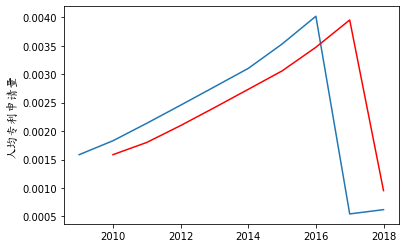

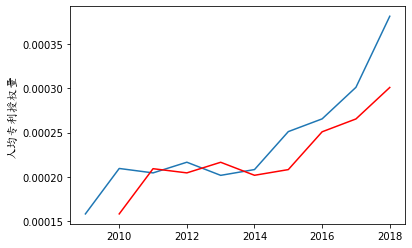

In [8]:
data = result['上海']
draw_picture(data)

# 正态性检验

In [9]:
from scipy import stats

In [10]:
for x in ["人均专利授权量","人均专利申请量","知识产权保护指数","人口数","全社会固定资产投入","GDP","经济开放度","外商直接投资"]:
    print(x)
    data = df[x].values
    print(stats.kstest(data,cdf='norm'))
    print(stats.shapiro(data))
    print('')

人均专利授权量
KstestResult(statistic=0.5000001282465886, pvalue=3.4453520789258593e-72)
ShapiroResult(statistic=0.7566372156143188, pvalue=4.339900018987493e-21)

人均专利申请量
KstestResult(statistic=0.5000011411725727, pvalue=3.4428849095812195e-72)
ShapiroResult(statistic=0.7110095024108887, pvalue=8.777053864840058e-23)

知识产权保护指数
KstestResult(statistic=0.865691051814601, pvalue=2.8749440166323855e-270)
ShapiroResult(statistic=0.8527191877365112, pvalue=1.538002059210466e-16)

人口数
KstestResult(statistic=1.0, pvalue=0.0)
ShapiroResult(statistic=0.7220760583877563, pvalue=2.1600167739493995e-22)

全社会固定资产投入
KstestResult(statistic=1.0, pvalue=0.0)
ShapiroResult(statistic=0.8763296008110046, pvalue=4.26213680641092e-15)

GDP
KstestResult(statistic=1.0, pvalue=0.0)
ShapiroResult(statistic=0.8398809432983398, pvalue=2.960171370267171e-17)

经济开放度
KstestResult(statistic=0.5522264325962429, pvalue=2.2724847767691192e-89)
ShapiroResult(statistic=0.7262271642684937, pvalue=3.049454541577959e-22)

外商直接投资
Kst

# 非参数检验：wilcoxons检验

In [11]:
from scipy import stats

In [12]:
for x in ["人均专利授权量","人均专利申请量","知识产权保护指数","人口数","全社会固定资产投入","GDP","经济开放度","外商直接投资"]:
    print(x)
    x1 = df[df['GDP_哑变量']==0][x].values
    x2 = df[df['GDP_哑变量']==1][x].values
    print(stats.wilcoxon(x1,x2,correction=True,alternative='two-sided'))
    print('')

人均专利授权量
WilcoxonResult(statistic=2646.0, pvalue=1.268473265079694e-09)

人均专利申请量
WilcoxonResult(statistic=3703.0, pvalue=2.8764379723629738e-05)

知识产权保护指数
WilcoxonResult(statistic=4255.0, pvalue=0.0013891332676679458)

人口数
WilcoxonResult(statistic=752.0, pvalue=3.232323375513912e-21)

全社会固定资产投入
WilcoxonResult(statistic=176.0, pvalue=1.0239096077165896e-25)

GDP
WilcoxonResult(statistic=0.0, pvalue=3.50419753821345e-27)

经济开放度
WilcoxonResult(statistic=2194.0, pvalue=6.0347267446938826e-12)

外商直接投资
WilcoxonResult(statistic=815.0, pvalue=9.419415013478591e-21)



# 相关性分析

In [13]:
df[["人均专利授权量","人均专利申请量","知识产权保护指数","人口数","全社会固定资产投入","GDP","经济开放度","外商直接投资"]].corr(method='pearson')

,人均专利授权量,人均专利申请量,知识产权保护指数,人口数,全社会固定资产投入,GDP,经济开放度,外商直接投资
人均专利授权量,1.000000,0.714627,0.332563,-0.032662,0.191274,0.402518,0.465583,0.624771
人均专利申请量,0.714627,1.000000,0.242457,-0.064853,0.069878,0.265239,0.502207,0.429346
知识产权保护指数,0.332563,0.242457,1.000000,0.020531,0.244905,0.211038,0.134666,0.228711
人口数,-0.032662,-0.064853,0.020531,1.000000,0.585914,0.603368,0.145616,0.265142
全社会固定资产投入,0.191274,0.069878,0.244905,0.585914,1.000000,0.870867,0.127457,0.441621
GDP,0.402518,0.265239,0.211038,0.603368,0.870867,1.000000,0.475377,0.745311
经济开放度,0.465583,0.502207,0.134666,0.145616,0.127457,0.475377,1.000000,0.671079
外商直接投资,0.624771,0.429346,0.228711,0.265142,0.441621,0.745311,0.671079,1.000000


# 回归分析

In [14]:
import statsmodels.formula.api as smf

In [15]:
result = smf.ols('人均专利授权量 ~ 知识产权保护指数 + 全社会固定资产投入 + 人口数 + 经济开放度 + 外商直接投资', data=df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                人均专利授权量   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     59.32
Date:                Wed, 06 Jan 2021   Prob (F-statistic):           1.65e-22
Time:                        20:04:35   Log-Likelihood:                 2424.2
No. Observations:                 310   AIC:                            -4842.
Df Residuals:                     307   BIC:                            -4831.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.002e-23   1.35e-23     -0.740      0.460   -3.67e-23    1.66e-23
知识产权保护指数    1.014e-20   1.37e-20      0.740      0.460   -1.68e-20    3.71e-20
全社会固定资产投入    2.09e-25   6.56e-26      3.188      0.002       8e-26    3.38e-25
人口数        -1.306e-14   1.76e-14     -0.740      0.460   -4.78e-14    2.17e-14
经济开放度      -1.924e-23    2.6e-23     -0.740      0.460   -7.04e-23    3.19e-23
外商直接投资      8.034e-22   6.32e-23     12.705      0.000    6.79e-22    9.28e-22
==============================================================================
Omnibus:                      122.879   Durbin-Watson:                   1.705
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              599.988
Skew:                           1.593   Prob(JB):                    5.18e-131
Kurtosis:                       9.025   Cond. No.                     4.08e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.08e+20. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
result = smf.ols('人均专利申请量 ~ 知识产权保护指数 + 全社会固定资产投入 + 人口数 + 经济开放度 + 外商直接投资', data=df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                人均专利申请量   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     4.935
Date:                Wed, 06 Jan 2021   Prob (F-statistic):            0.00777
Time:                        20:13:06   Log-Likelihood:                 1727.2
No. Observations:                 310   AIC:                            -3448.
Df Residuals:                     307   BIC:                            -3437.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8.026e-23   1.28e-22      0.625      0.532   -1.72e-22    3.33e-22
知识产权保护指数   -8.119e-20    1.3e-19     -0.625      0.532   -3.37e-19    1.74e-19
全社会固定资产投入   1.169e-24   6.21e-25      1.882      0.061   -5.32e-26    2.39e-24
人口数         1.046e-13   1.67e-13      0.625      0.532   -2.24e-13    4.34e-13
经济开放度       1.541e-22   2.46e-22      0.625      0.532   -3.31e-22    6.39e-22
外商直接投资      4.889e-21   5.99e-22      8.162      0.000    3.71e-21    6.07e-21
==============================================================================
Omnibus:                       79.658   Durbin-Watson:                   1.229
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              434.890
Skew:                           0.925   Prob(JB):                     3.67e-95
Kurtosis:                       8.499   Cond. No.                     4.08e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.08e+20. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 分组回归

## GDP低于中位数

In [20]:
result = smf.ols('人均专利申请量 ~ 知识产权保护指数 + 全社会固定资产投入 + 人口数 + 经济开放度 + 外商直接投资',
                 data=df[df['GDP_哑变量']==0]).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                人均专利申请量   R-squared:                      -0.012
Model:                            OLS   Adj. R-squared:                 -0.026
Method:                 Least Squares   F-statistic:                   -0.9210
Date:                Wed, 06 Jan 2021   Prob (F-statistic):               1.00
Time:                        20:21:19   Log-Likelihood:                 915.42
No. Observations:                 155   AIC:                            -1825.
Df Residuals:                     152   BIC:                            -1816.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.775e-23   5.57e-22     -0.104      0.918   -1.16e-21    1.04e-21
知识产权保护指数    4.052e-19   3.91e-18      0.104      0.918   -7.31e-18    8.12e-18
全社会固定资产投入   1.243e-24    1.7e-24      0.733      0.465   -2.11e-24    4.59e-24
人口数        -3.759e-14   3.62e-13     -0.104      0.918   -7.54e-13    6.78e-13
经济开放度      -3.433e-23   3.31e-22     -0.104      0.918   -6.88e-22     6.2e-22
外商直接投资       1.88e-20   2.94e-21      6.403      0.000     1.3e-20    2.46e-20
==============================================================================
Omnibus:                       77.715   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              286.283
Skew:                           1.958   Prob(JB):                     6.83e-63
Kurtosis:                       8.385   Cond. No.                     1.13e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+21. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## GDP高于中位数

In [21]:
result = smf.ols('人均专利申请量 ~ 知识产权保护指数 + 全社会固定资产投入 + 人口数 + 经济开放度 + 外商直接投资',
                 data=df[df['GDP_哑变量']==1]).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                人均专利申请量   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     4.058
Date:                Wed, 06 Jan 2021   Prob (F-statistic):             0.0192
Time:                        20:21:25   Log-Likelihood:                 839.10
No. Observations:                 155   AIC:                            -1672.
Df Residuals:                     152   BIC:                            -1663.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.123e-23   9.52e-23      0.223      0.824   -1.67e-22    2.09e-22
知识产权保护指数   -8.373e-19   3.75e-18     -0.223      0.824   -8.25e-18    6.58e-18
全社会固定资产投入   1.122e-24   7.59e-25      1.478      0.142   -3.78e-25    2.62e-24
人口数         4.737e-14   2.12e-13      0.223      0.824   -3.72e-13    4.67e-13
经济开放度       6.693e-23      3e-22      0.223      0.824   -5.26e-22     6.6e-22
外商直接投资        4.8e-21   7.21e-22      6.661      0.000    3.38e-21    6.22e-21
==============================================================================
Omnibus:                       32.763   Durbin-Watson:                   1.184
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.254
Skew:                           0.746   Prob(JB):                     3.11e-24
Kurtosis:                       6.813   Cond. No.                     2.19e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.19e+21. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## GDP低于中位数

In [22]:
result = smf.ols('人均专利授权量 ~ 知识产权保护指数 + 全社会固定资产投入 + 人口数 + 经济开放度 + 外商直接投资',
                 data=df[df['GDP_哑变量']==0]).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                人均专利授权量   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     1.793
Date:                Wed, 06 Jan 2021   Prob (F-statistic):              0.170
Time:                        20:23:30   Log-Likelihood:                 1234.2
No. Observations:                 155   AIC:                            -2462.
Df Residuals:                     152   BIC:                            -2453.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6.602e-23   7.12e-23     -0.927      0.355   -2.07e-22    7.47e-23
知识产权保护指数    4.632e-19      5e-19      0.927      0.355   -5.24e-19    1.45e-18
全社会固定资产投入   2.885e-25   2.17e-25      1.330      0.186    -1.4e-25    7.17e-25
人口数        -4.298e-14   4.64e-14     -0.927      0.355   -1.35e-13    4.86e-14
经济开放度      -3.925e-23   4.23e-23     -0.927      0.355   -1.23e-22    4.44e-23
外商直接投资      2.321e-21   3.76e-22      6.179      0.000    1.58e-21    3.06e-21
==============================================================================
Omnibus:                       93.794   Durbin-Watson:                   1.270
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              496.831
Skew:                           2.258   Prob(JB):                    1.30e-108
Kurtosis:                      10.519   Cond. No.                     1.13e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+21. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## GDP高于中位数

In [23]:
result = smf.ols('人均专利授权量 ~ 知识产权保护指数 + 全社会固定资产投入 + 人口数 + 经济开放度 + 外商直接投资',
                 data=df[df['GDP_哑变量']==1]).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                人均专利授权量   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.352
Method:                 Least Squares   F-statistic:                     42.83
Date:                Wed, 06 Jan 2021   Prob (F-statistic):           1.76e-15
Time:                        20:25:38   Log-Likelihood:                 1203.5
No. Observations:                 155   AIC:                            -2401.
Df Residuals:                     152   BIC:                            -2392.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -8.071e-24   9.07e-24     -0.890      0.375    -2.6e-23    9.84e-24
知识产权保护指数    3.184e-19   3.58e-19      0.890      0.375   -3.88e-19    1.02e-18
全社会固定资产投入   1.982e-25   7.24e-26      2.739      0.007    5.52e-26    3.41e-25
人口数        -1.801e-14   2.02e-14     -0.890      0.375    -5.8e-14     2.2e-14
经济开放度      -2.545e-23   2.86e-23     -0.890      0.375   -8.19e-23     3.1e-23
外商直接投资      7.949e-22   6.87e-23     11.575      0.000    6.59e-22    9.31e-22
==============================================================================
Omnibus:                       37.862   Durbin-Watson:                   1.722
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.037
Skew:                           1.027   Prob(JB):                     7.64e-20
Kurtosis:                       6.068   Cond. No.                     2.19e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.19e+21. This might indicate that there are
strong multicollinearity or other numerical problems.
"""